In [131]:
import trendln
from libs.pubsub import get_ps_1
import matplotlib.pyplot as plt
from custom_package import candle
import numpy as np
import datetime
from libs.values import isNonTradingDay
import os
import pickle
import yfinance as yf
import numpy as np
from scipy.signal import argrelextrema

In [2]:
ohlcs = None
# testday = '05-31'
testday = '06-02'
testdaystr = f'2021-{testday}'
fname = f'testdata/^NSEI-{testdaystr}-5m'
testdt = datetime.datetime.strptime(testdaystr, '%Y-%m-%d').date()
if(isNonTradingDay(testdt)):
    print('Non trading day')
else:
    if(os.path.exists(fname)):
        with open(fname, 'rb') as ff:
            ohlcs = pickle.load(ff)
    else:
        print('downloading...')
        ohlcs = yf.download('^NSEI', start=testdt, end=testdt +
                            datetime.timedelta(days=1), interval='5m')
        if(not ohlcs is None):
            with open(fname, 'wb') as ff:
                pickle.dump(ohlcs, ff)

downloading...
[*********************100%***********************]  1 of 1 completed


In [44]:
data = ohlcs.Close
N = len(data)

/Users/ronsair/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


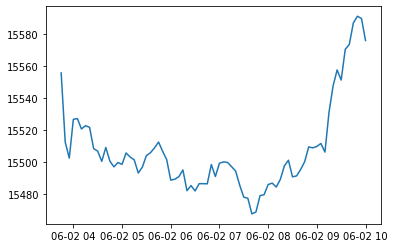

In [6]:
plt.plot(data)
plt.show()

In [7]:
Ys = np.fft.rfft(data)

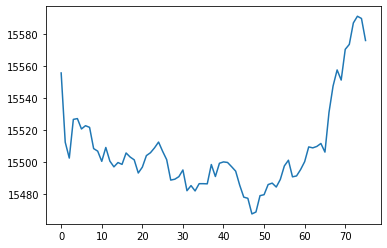

In [76]:
ys = np.fft.irfft(Ys, N)
plt.plot(ys)

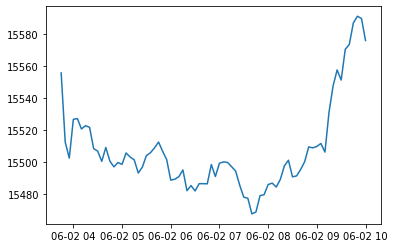

In [83]:
plt.plot(data)

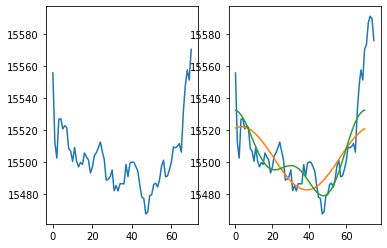

In [101]:
data1 = ohlcs.Close


data = data1[:-5]
ax1 = plt.subplot(1,2,1)
ax1.plot(range(len(data)),data)

ax2 = plt.subplot(1,2,2, sharey=ax1)

ax2.plot(range(len(data1)),data1)

N = len(data)
Ys = np.fft.rfft(data)
# ys = np.fft.irfft(Ys[0:1], N)
# ax2.plot(ys)
ys = np.fft.irfft(Ys[0:2], N)
ax2.plot(ys)
ys = np.fft.irfft(Ys[0:3], N)
ax2.plot(ys)
# ys = np.fft.irfft(Ys[0:4], N)
# ax2.plot(ys)

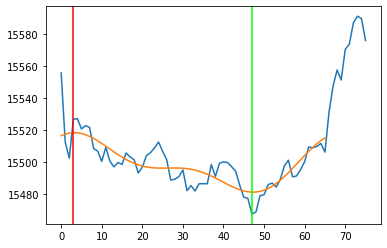

In [168]:
data1 = ohlcs.Close


data = data1[:-10]

ax2 = plt.gca()

ax2.plot(range(len(data1)),data1)

N = len(data)
Ys = np.fft.rfft(data)

# ys = np.fft.irfft(Ys[0:1], N)
# ax2.plot(ys)

# ys = np.fft.irfft(Ys[0:2], N)
# ax2.plot(ys)

ys = np.fft.irfft(Ys[0:3], N)
ax2.plot(ys)
# maxs = argrelextrema(ys, np.greater, order=6, mode='wrap')
maxs = argrelextrema(ys, np.greater, order=6)
for mx in maxs[0]:
    ax2.axvline(x=mx, color='#ff0000')

# mins = argrelextrema(ys, np.less, order=6, mode='wrap')
mins = argrelextrema(ys, np.less, order=6)
for mx in mins[0]:
    ax2.axvline(x=mx, color='#00ff00')



# ys = np.fft.irfft(Ys[0:4], N)
# ax2.plot(ys)

In [146]:
mins

(array([21, 48]),)

In [115]:
from scipy.signal import argrelextrema

In [117]:
argrelextrema(ys, np.greater)

(array([30]),)

TODO:
digitize between last two extremas and take actions
